# See the Performance of Detecting Fish with IPV3 of Bbox

In [2]:
import os
from mylib.models.bboxregressor import Ipv3BboxRegressor, slide_bboxes
from mylib.dataio import TestDataReader
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline

file_dir_path = os.path.dirname(os.path.abspath('__file__'))

# settings
seed = 7
np.random.seed(seed)
weights_file = os.path.join(file_dir_path, "ipv3_bbox_regressor_weights_2/ipv3_bbox_regressor_nb_5-184--10.47-19.39.h5")
print weights_file

/Users/liuweijie/WorkSpace/NFCM_Classification/region_detect/ipv3_bbox_regressor_weights_2/ipv3_bbox_regressor_nb_5-184--10.47-19.39.h5


Using TensorFlow backend.


In [3]:
# load test dataset
Test_data_reader = TestDataReader()
images_test, image_names_test, _ = Test_data_reader.load_test_image_bbox_imgname(debug=0)

Start loading test dataset!
Finish loading test data!


In [4]:
# load bbox regressor
ipv3_bbox = Ipv3BboxRegressor(weights_file)

In [5]:
image_idxs = range(530, 540)
images_show = images_test[image_idxs]
bboxes_show = ipv3_bbox.predict_with_slide_bbox(images_show) 

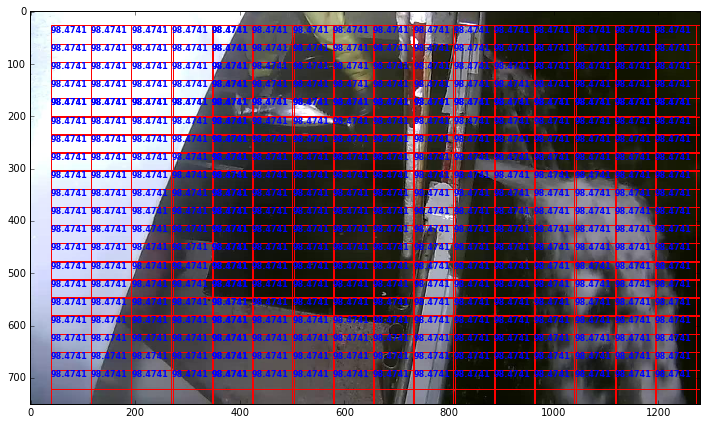

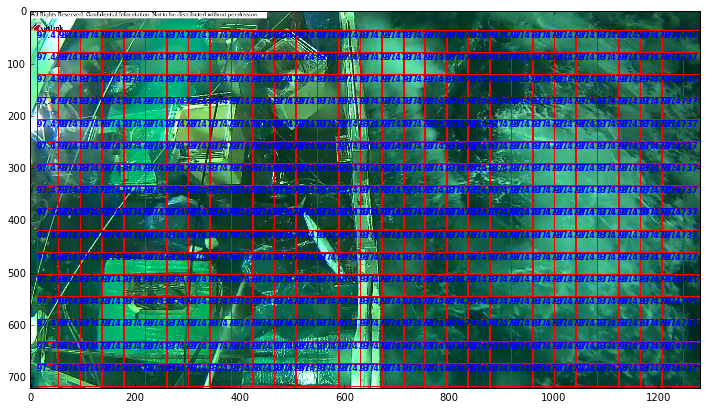

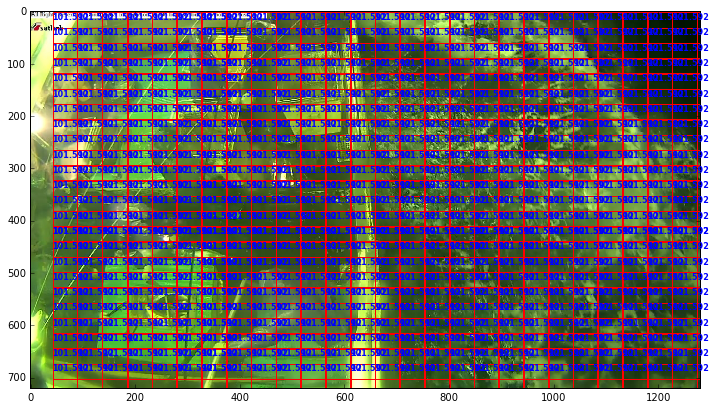

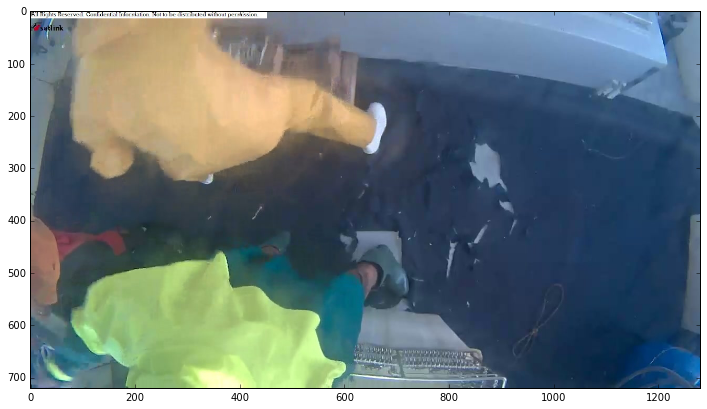

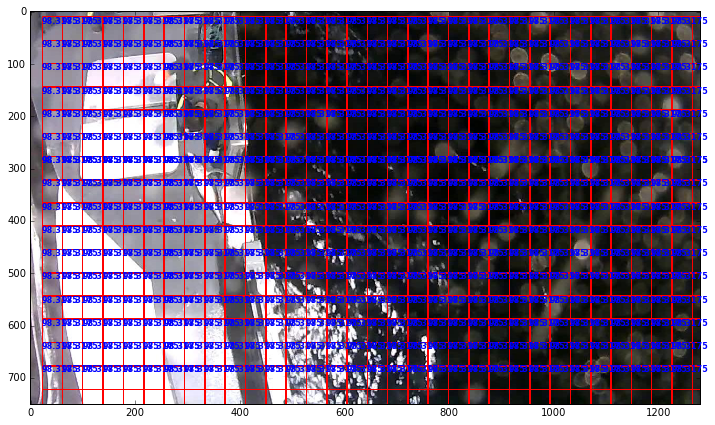

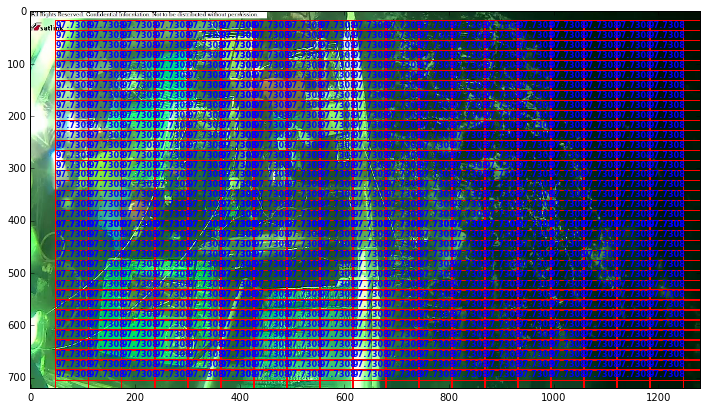

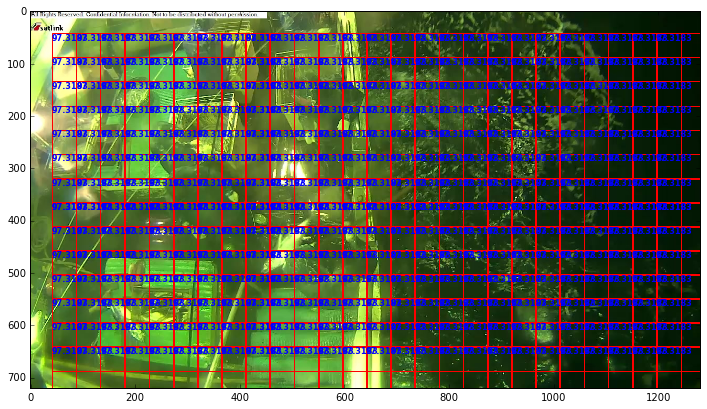

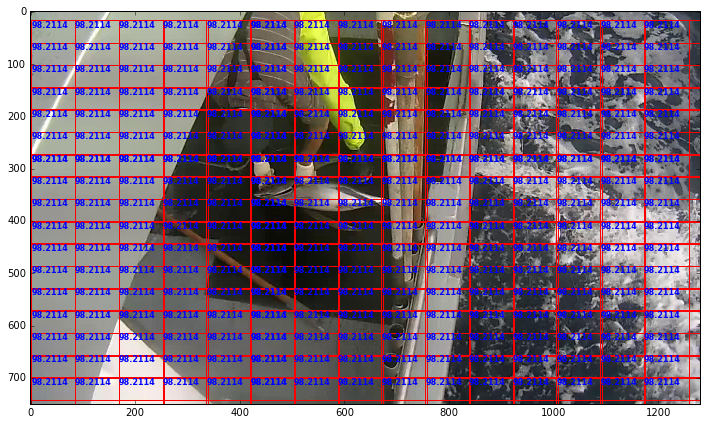

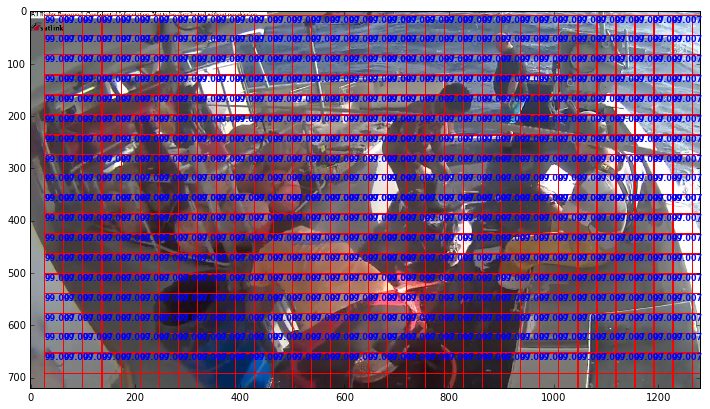

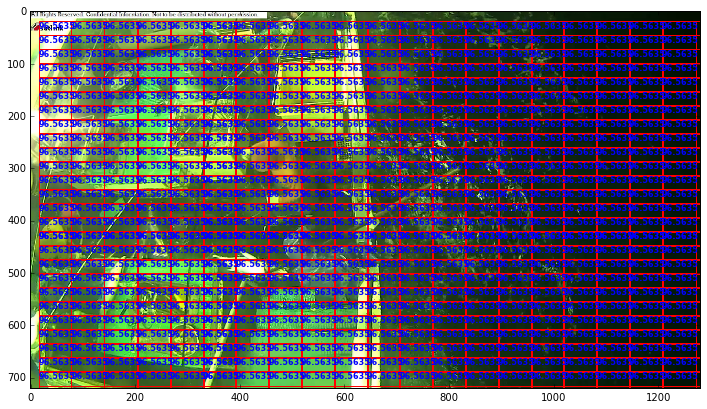

In [6]:
for i in range(len(images_show)):
    image = images_show[i]
    bboxes = bboxes_show[i]
    
    # draw rectangles on the original image
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))
    ax.imshow(image.astype('uint8'))
    for idx in range(len(bboxes)):
        bbox = bboxes[idx]
        x, y, w, h, p = bbox[:]
        rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.annotate(str(p), (x, y), color='b', weight='bold', fontsize=8, ha='left', va='top')
        ax.add_patch(rect)
    plt.show()